In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
root =Path('./data')

In [3]:
use_cuda = torch.cuda.is_available()

In [4]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.0,),(1.0,))])

In [5]:
train_set = dsets.MNIST(root=root,train=True,transform=trans,download=True)
test_set = dsets.MNIST(root=root,train=False,transform=trans,download=True)

In [6]:
type(train_set)

torchvision.datasets.mnist.MNIST

In [6]:
from torch.utils.data import DataLoader
batch_size=100
train_loader = DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_set,batch_size=batch_size,shuffle=False)

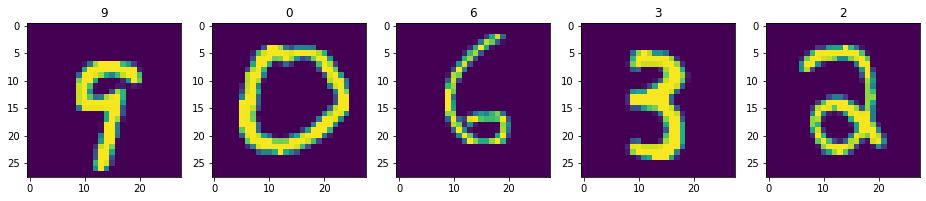

In [7]:
fig, axes = plt.subplots(1,5,figsize=(16,16))

for i in range(5):
    j = np.random.randint(0,len(train_set))

    axes[i].imshow(train_set[j][0].numpy().reshape(28,28),);
    axes[i].set_title(train_set[j][1])


In [100]:
model = nn.Sequential(nn.Linear(28*28,500),
                      nn.ReLU(),
                      nn.Linear(500,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10))

In [11]:
if use_cuda:
    model = model.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

In [12]:
epochs = 10
losses = []
for epoch in range(epochs):
    ave_loss = 0.0
    for  i,(x,y) in enumerate(train_loader):
        
        if use_cuda:
            x = x.reshape(-1,28*28).cuda()
            y = y.cuda()
            output = model(x)
            
        else:
            x = x.reshape(-1,28*28)
            output = model(x)
        
        optimizer.zero_grad()
        
        loss = criterion(output,y)
        
        ave_loss = ave_loss * (i/(i+1)) +  loss.item()*(1/(i+1)) 
        
        loss.backward()
        
        optimizer.step()

        if (i+1) % 100 == 0 or (i+1) == len(train_loader):
            losses.append(ave_loss)
            print('==>>> epoch: %d, batch index: %d, train loss: %.6f' % (epoch, i+1, ave_loss))
        

==>>> epoch: 0, batch index: 100, train loss: 0.521932
==>>> epoch: 0, batch index: 200, train loss: 0.402629
==>>> epoch: 0, batch index: 300, train loss: 0.334939
==>>> epoch: 0, batch index: 400, train loss: 0.299621
==>>> epoch: 0, batch index: 500, train loss: 0.279337
==>>> epoch: 0, batch index: 600, train loss: 0.260160
==>>> epoch: 1, batch index: 100, train loss: 0.146131
==>>> epoch: 1, batch index: 200, train loss: 0.142300
==>>> epoch: 1, batch index: 300, train loss: 0.149553
==>>> epoch: 1, batch index: 400, train loss: 0.152300
==>>> epoch: 1, batch index: 500, train loss: 0.151750
==>>> epoch: 1, batch index: 600, train loss: 0.151789
==>>> epoch: 2, batch index: 100, train loss: 0.121876
==>>> epoch: 2, batch index: 200, train loss: 0.115745
==>>> epoch: 2, batch index: 300, train loss: 0.119678
==>>> epoch: 2, batch index: 400, train loss: 0.121034
==>>> epoch: 2, batch index: 500, train loss: 0.120675
==>>> epoch: 2, batch index: 600, train loss: 0.123666
==>>> epoc

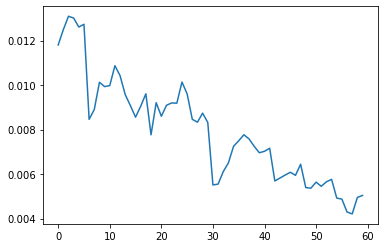

In [101]:
plt.plot(losses);

In [14]:
predictions = []
for i in range(len(test_set)):
    z = model(test_set[i][0].reshape(-1,28*28).cuda())
    predictions.append(z.argmax().cpu().item())
        

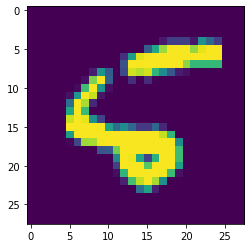

In [19]:
plt.imshow(test_set[8][0].numpy().reshape(28,28))

In [20]:
predictions = np.array(predictions)

In [21]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
test_set.test_labels.numpy()

C:\Users\niels\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
len(predictions[predictions==test_set.test_labels.numpy()])/10000

0.9748

In [8]:
cnn_model = nn.Sequential(nn.Conv2d(1,32,3),
                         nn.ReLU(),
                         nn.MaxPool2d(2,2),
                         nn.Flatten(),
                         nn.Linear(5408,256),
                         nn.ReLU(),
                         nn.Linear(256,10))

In [9]:
cnn_model = cnn_model.cuda()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.005)

criterion = nn.CrossEntropyLoss()

In [10]:
epochs = 10
losses = []
for epoch in range(epochs):
    ave_loss = 0.0
    for  i,(x,y) in enumerate(train_loader):
        
        x = x.cuda()
        y = y.cuda()
        output = cnn_model(x)
        
        optimizer.zero_grad()
        
        loss = criterion(output,y)
        
        ave_loss = ave_loss * (i/(1+i)) + loss.item() * (1/(i+1))
        
        loss.backward()
        
        optimizer.step()

        if (i+1) % 100 == 0 or (i+1) == len(train_loader):
            losses.append(ave_loss)
            print('==>>> epoch: %d, batch index: %d, train loss: %.6f' % (epoch, i+1, ave_loss))

==>>> epoch: 0, batch index: 100, train loss: 0.569376
==>>> epoch: 0, batch index: 200, train loss: 0.361347
==>>> epoch: 0, batch index: 300, train loss: 0.280411
==>>> epoch: 0, batch index: 400, train loss: 0.234359
==>>> epoch: 0, batch index: 500, train loss: 0.205670
==>>> epoch: 0, batch index: 600, train loss: 0.184148
==>>> epoch: 1, batch index: 100, train loss: 0.054904
==>>> epoch: 1, batch index: 200, train loss: 0.053118
==>>> epoch: 1, batch index: 300, train loss: 0.054972
==>>> epoch: 1, batch index: 400, train loss: 0.054126
==>>> epoch: 1, batch index: 500, train loss: 0.054404
==>>> epoch: 1, batch index: 600, train loss: 0.052662
==>>> epoch: 2, batch index: 100, train loss: 0.029474
==>>> epoch: 2, batch index: 200, train loss: 0.030701
==>>> epoch: 2, batch index: 300, train loss: 0.029169
==>>> epoch: 2, batch index: 400, train loss: 0.029433
==>>> epoch: 2, batch index: 500, train loss: 0.031950
==>>> epoch: 2, batch index: 600, train loss: 0.032842
==>>> epoc

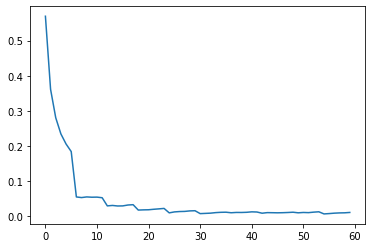

In [11]:
plt.plot(losses);

In [12]:
predictions = []
for i in range(len(test_set)):
    z = cnn_model(test_set[i][0].reshape(1,1,28,28).cuda())
    predictions.append(z.argmax().cpu().item())

In [13]:
predictions = np.array(predictions)

In [14]:
len(predictions[predictions.T==test_set.test_labels.numpy()])/10000

C:\Users\niels\anaconda3\envs\ai\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


0.9846

In [15]:
cnn_model_2 = nn.Sequential(nn.Conv2d(1,32,3),
                         nn.ReLU(),
                         nn.MaxPool2d(2,2),
                         nn.Conv2d(32,64,3),
                         nn.ReLU(),
                         nn.MaxPool2d(2,2),
                         nn.Conv2d(64,64,3),
                         nn.ReLU(),
                         nn.Flatten(),
                         nn.Linear(576,64),
                         nn.ReLU(),
                         nn.Linear(64,10))

In [16]:
cnn_model_2 = cnn_model_2.cuda()
optimizer = optim.SGD(cnn_model_2.parameters(), lr=0.005,momentum=0.9)

criterion = nn.CrossEntropyLoss()

In [17]:
epochs = 10
losses = []
for epoch in range(epochs):
    ave_loss = 0.0
    for  i,(x,y) in enumerate(train_loader):
        
        x = x.cuda()
        y = y.cuda()
        output = cnn_model_2(x)
        
        optimizer.zero_grad()
        
        loss = criterion(output,y)
        
        ave_loss = ave_loss * i/(1+i) + loss.item() * 1/(1+i)
        
        loss.backward()
        
        optimizer.step()

        if (i+1) % 100 == 0 or (i+1) == len(train_loader):
            losses.append(ave_loss)
            print('==>>> epoch: %d, batch index: %d, train loss: %.6f' % (epoch, i+1, ave_loss))

==>>> epoch: 0, batch index: 100, train loss: 2.294706
==>>> epoch: 0, batch index: 200, train loss: 2.191935
==>>> epoch: 0, batch index: 300, train loss: 1.702930
==>>> epoch: 0, batch index: 400, train loss: 1.379227
==>>> epoch: 0, batch index: 500, train loss: 1.172409
==>>> epoch: 0, batch index: 600, train loss: 1.021693
==>>> epoch: 1, batch index: 100, train loss: 0.215113
==>>> epoch: 1, batch index: 200, train loss: 0.207545
==>>> epoch: 1, batch index: 300, train loss: 0.197008
==>>> epoch: 1, batch index: 400, train loss: 0.189479
==>>> epoch: 1, batch index: 500, train loss: 0.180055
==>>> epoch: 1, batch index: 600, train loss: 0.170613
==>>> epoch: 2, batch index: 100, train loss: 0.118983
==>>> epoch: 2, batch index: 200, train loss: 0.110765
==>>> epoch: 2, batch index: 300, train loss: 0.108681
==>>> epoch: 2, batch index: 400, train loss: 0.107279
==>>> epoch: 2, batch index: 500, train loss: 0.104459
==>>> epoch: 2, batch index: 600, train loss: 0.101597
==>>> epoc

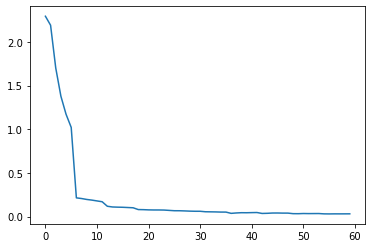

In [18]:
plt.plot(losses)

In [19]:
predictions = []
for i in range(len(test_set)):
    z = cnn_model_2(test_set[i][0].reshape(1,1,28,28).cuda())
    predictions.append(z.argmax().cpu().item())

In [20]:
predictions = np.array(predictions)
len(predictions[predictions.T==test_set.test_labels.numpy()])/10000

0.9869

In [106]:
from PIL import Image

In [107]:
class ContentLoss(nn.Module):
    
    def __init__(self,target):
        super().__init__()
        self.target = target.detach()
        
    def forward(self,inp):
        self.loss = F.mse_loss(inp,self.target)
        return inp

In [108]:
def gram_matrix(input):
    a, b, c, d = input.size()
    
    features = input.reshape(a * b, c * d)
    
    G = torch.mm(features,features.t())
    
    return G.div( a * b * c * d)

In [109]:
class StyleLoss(nn.Module):
    
    def __init__(self,target_feature):
        super().__init__()
        self.target = gram_matrix(target_feature).detach()
        
    def forward(self,inp):
        G = gram_matrix(inp)
        self.loss = F.mse_loss(G,self.target)
        return inp

In [110]:
cnn = models.vgg19(pretrained=True).features.to(torch.device('cuda')).eval()

In [111]:
for param in cnn.parameters():
    param.requires_grad = False

In [112]:
print(cnn)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [113]:
cnn_normalization_mean = torch.tensor([0.485,0.456,0.406]).cuda()
cnn_normalization_std = torch.tensor([0.229,0.224,0.225]).cuda()

In [114]:
class Normalization(nn.Module):
    
    def __init__(self,mean,std):
        super().__init__()
        self.mean = torch.tensor(mean).reshape(-1,1,1)
        self.std = torch.tensor(std).reshape(-1,1,1)
        
    def forward(self,img):
        return (img - self.mean) / self.std

In [115]:
normalization=Normalization(cnn_normalization_mean,cnn_normalization_std).cuda()

<ipython-input-114-0cc69341f952>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).reshape(-1,1,1)
<ipython-input-114-0cc69341f952>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).reshape(-1,1,1)


In [116]:
model = nn.Sequential(normalization)
i = 0
    
for layer in cnn.children():
        if isinstance(layer,nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer,nn.ReLU):
            name = 'relu_{}'.format(i)
            layer=nn.ReLU(inplace=False)
        elif isinstance(layer,nn.MaxPool2d):
            name='pool_{}'.format(i)
        elif isinstance(layer,nn.BatchNorm2d):
            name='bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))
            
        model.add_module(name,layer)

In [117]:
model

Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2): ReLU()
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_4): ReLU()
  (pool_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_5): ReLU()
  (conv_6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_6): ReLU()
  (conv_7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_7): ReLU()
  (conv_8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_8): ReLU()
  (po

In [118]:
model.conv_1.weight.size()

torch.Size([64, 3, 3, 3])

In [120]:
import copy

content_layers_default = ['conv_4']
style_layers_default = ['conv_1','conv_2','conv_3','conv_4','conv_5']

def get_style_model_and_losses(cnn,normalization_mean,
                              normalization_std,
                              content_img,
                              style_img,
                              content_layers=content_layers_default,
                              style_layers=style_layers_default):
    
    cnn = copy.deepcopy(cnn)
    
    normalization=Normalization(normalization_mean,normalization_std).cuda()
    
    content_losses = []
    style_losses = []
    
    model = nn.Sequential(normalization)

    i = 0
    
    for layer in cnn.children():
        if isinstance(layer,nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer,nn.ReLU):
            name = 'relu_{}'.format(i)
            layer=nn.ReLU(inplace=False)
        elif isinstance(layer,nn.MaxPool2d):
            name='pool_{}'.format(i)
        elif isinstance(layer,nn.BatchNorm2d):
            name='bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))
            
        model.add_module(name,layer)
        
        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module('content_loss_{}'.format(i),content_loss)
            content_losses.append(content_loss)
            
        if name in style_layers:
            
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module('style_loss_{}'.format(i),style_loss)
            style_losses.append(style_loss)
            
    for i in range(len(model)-1,-1,-1):
        if isinstance(model[i],ContentLoss) or isinstance(model[i],StyleLoss):
            break
            
    model = model[:(i+1)]
    
    return model, style_losses, content_losses
            
                              
                       
        


In [121]:
def get_input_optimizer(input_img):
    optimizer = optim.LBFGS([input_img.requires_grad_()])
    return optimizer


In [122]:
def run_style_transfer(cnn,normalization_mean,normalization_std,
                      content_img,style_img,input_img,num_steps=500,
                      style_weight=1000000,content_weight=1):
    print('Building the style transfer model...')
    
    model,style_losses,content_losses = get_style_model_and_losses(cnn,
                                            normalization_mean,
                                            normalization_std,
                                            content_img,
                                            style_img )
    optimizer = get_input_optimizer(input_img)
    
    print('Optimizing...')
    run = [0]
    while run[0] <= num_steps:
        
        def closure():
            input_img.data.clamp_(0,1)
        
            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
        
            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            
            style_score *= style_weight
            content_score *= content_weight
        
            loss = style_score + content_score
            loss.backward()
        
            run[0] += 1
            if run[0] % 50 == 0:
                print('Style Loss: {:4f} Content loss: {:4f}'.format(
                style_score.item(),content_score.item()))
                print()
        
            return style_score + content_score
        
        optimizer.step(closure)
        
    input_img.data.clamp_(0,1)
        
    return input_img
        

In [123]:
imsize = [600,600]

In [124]:
loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()])

In [126]:
def image_loader(path):
    image = Image.open(path)     
    image = loader(image).unsqueeze(0)
    return image.cuda()

In [127]:
unloader = transforms.ToPILImage()

plt.ion

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    image.show()

In [134]:
content_img = image_loader(r'../../data_1/Images/tulips.jpg')
style_img = image_loader(r'../../data_1/Images/vangogh.jpg')
input_img = image_loader(r'../../data_1/Images/tulips.jpg')

In [129]:
imshow(style_img);

In [88]:
imshow(model[0](style_img))

In [89]:
first_feature_map = model.conv_1(model[0](style_img))

In [90]:
first_feature_map.size()

torch.Size([1, 64, 600, 600])

In [91]:
features = first_feature_map.reshape(1 * 64, 600 * 600)

In [92]:
features.size()

torch.Size([64, 360000])

In [93]:
(features @ features.t())/360000.0

tensor([[ 1.0739, -0.1657,  1.9678,  ..., -0.6748, -0.2790, -0.2072],
        [-0.1657,  1.6732, -0.7467,  ..., -0.0188, -0.3633,  0.4327],
        [ 1.9678, -0.7467,  6.2942,  ..., -2.9525, -0.6150, -0.7442],
        ...,
        [-0.6748, -0.0188, -2.9525,  ...,  2.8915,  0.2135,  0.1712],
        [-0.2790, -0.3633, -0.6150,  ...,  0.2135,  0.3617, -0.1296],
        [-0.2072,  0.4327, -0.7442,  ...,  0.1712, -0.1296,  1.2092]],
       device='cuda:0')

In [94]:
imshow(model.conv_2(nn.ReLU()(first_feature_map))[0,23])

In [135]:
model,style_losses,content_losses = get_style_model_and_losses(cnn,
                                                              cnn_normalization_mean,
                                                              cnn_normalization_std,
                                                              style_img,
                                                              content_img)

<ipython-input-114-0cc69341f952>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).reshape(-1,1,1)
<ipython-input-114-0cc69341f952>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).reshape(-1,1,1)


In [136]:
print(model)

Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_1): StyleLoss()
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_2): StyleLoss()
  (relu_2): ReLU()
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_3): StyleLoss()
  (relu_3): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (content_loss_4): ContentLoss()
  (style_loss_4): StyleLoss()
  (relu_4): ReLU()
  (pool_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_5): StyleLoss()
)


In [137]:
style_losses

[StyleLoss(), StyleLoss(), StyleLoss(), StyleLoss(), StyleLoss()]

In [138]:
num_steps=400
style_weight=600000
content_weight=1.18


output = run_style_transfer(cnn,cnn_normalization_mean,cnn_normalization_std,
                      content_img,style_img,input_img,num_steps,
                      style_weight,content_weight)

Building the style transfer model...
Optimizing...


<ipython-input-114-0cc69341f952>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).reshape(-1,1,1)
<ipython-input-114-0cc69341f952>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).reshape(-1,1,1)


Style Loss: 32.781399 Content loss: 39.697495

Style Loss: 7.862803 Content loss: 23.375471

Style Loss: 4.094740 Content loss: 18.874491

Style Loss: 2.620141 Content loss: 17.110979

Style Loss: 1.985407 Content loss: 16.123154

Style Loss: 1.630729 Content loss: 15.600616

Style Loss: 1.338733 Content loss: 15.283038

Style Loss: 1.146997 Content loss: 15.054875



In [139]:
imshow(output,title='Output image')


In [ ]:
im = output.cpu().detach().reshape(3,600,600)
pict = unloader(im)
pict.save(r'./data/stained_tulips.jpg')